<a href="https://www.kaggle.com/code/alicjapiaskowska/how-happy-are-the-people-in-the-world?scriptVersionId=173537860" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**How happy are the people in the world? Analysis of the degree of life satisfaction over the years**

> The subject of this study is to analyze the happiness of society in individual countries of the world over the years 2015-2020. The analysis is based on data from the "World Happiness Report".

> World Happiness Report is a survey of the state of global happiness. It classifies countries around the world according to how happy their citizens feel. These reports are based on a wide range of data, with the Gallup World Poll being the most important source. Gallup World Poll life ratings form the basis of the annual happiness rankings that are always of general interest.


> The work uses 6 files with the csv extension related to the level of happiness in individual countries over the years 2015-2020. 

### Import the necessary libraries

> In the work involving importing, analyzing, and processing. Csv files in Python, it is necessary to implement libraries that enable data manipulation.

> The library used in the implementation of this work is the pandas library. Standard operations performed with it were reading data, reviewing data structure, creating data frames, as well as cleaning and modifying data.

> GeoPandas is a geospatial data library. Thanks to this library, it is possible to reference information spatially without the need to connect additional databases such as PostGIS. In this project, the library was used to prepare interactive maps.

> Another library used in the project is Matplotlib. It is used to create various types of charts. This library can be imported in several ways. The official documentation suggests, however, to use explicit imports in more complex projects, i.e. use
> - import numpy as e.g.
> - import matplotlib.pyplot as plt

> Plotly is a Python graphics library. Thanks to it, you can create interactive charts of high quality.

> In addition, the itables package was also used to present data in interactive tables.

In [1]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns

pd.options.mode.chained_assignment = None

### Loading data. Converting the data to the same column format.

> The data analysis process started with finding the right data sources and downloading the materials. Then the data was uploaded to the Project using the "pd.read_csv" command. Uploaded files should be in the same folder as the Project.
The key and necessary from the point of view of data analysis is the proper preparation of data for further processes.

> The following processes were carried out as part of data recognition:
> - data mining
> - changing the names of the columns so that each data frame contains columns with the same names.
> - joining together two datasets to obtain information about the region
> - normalization of data contained in individual columns

> The first step was to recognize the content of the acquired data and display basic information about the imported data, i.e. data mining
 Instructions were used here
* .info ()
* .head (5)
> The first command provides the necessary information about the data, ie the name of the column, the amount of missing data in the columns, and the data type of each column.
Using the head (5) command, the first 5 lines from each dataset were displayed. These rows have been sorted in ascending order according to the ranking column for the given year.
The above-mentioned functions allow you to quickly check the quality of the obtained data, without the need to display entire tables. This is convenient when analyzing multiple complex data sets.

> The next step involved systematizing the column names in all data frames. The .rename () method was used for this operation.

> Not every dataset had information about the region of a given country. This information is valuable due to further analysis. Using the pd.merge function, the data sets were joined together in such a way that each of them contained information about the region.

> An indispensable operation during data pre-processing is also the normalization of the indicators. Thanks to this procedure, it is possible to compare sets with each other and their further analysis. The study used scaling of the min-max function. This approach is called normalization and it scales the feature to range from 0 to 1. This is done by subtracting the minimum value of the feature and then dividing it by the range. The study uses the minimum value-maximum value scaling using the .min () and .max () methods.

# Column names adopted for analysis and description of the content:

> It was decided to accept the following data for the analysis:

> - Country - country name
> - Year - the year to which the data relate
> - Region - the name of the region
> - Happiness Rank - place in the country ranking based on Happiness Score.
> - Happiness Score - Happiness score. Measure measured by asking the respondents the question: "How would you rate your happiness on a scale of 0 to 10, with 10 being the happiest".
> - Economy (GDP per Capita) - Gross Domestic Product per capita. The extent to which GDP contributes to the calculation of the satisfaction index.
> - Family - family. The extent to which the Family contributes to the satisfaction index calculation
> - Health (Life Expectancy) - life expectancy. The extent to which life expectancy contributed to the calculation of the satisfaction index
> - Freedom - freedom. The extent to which freedom contributed to the satisfaction index calculation.
> - Trust (Government Corruption) - government corruption. The extent to which the perception of corruption influences the satisfaction score.
> - Generosity - generosity, generosity. The extent to which generosity contributed to the satisfaction score calculation.

> All operations, such as column renaming or normalization, applied to the above-mentioned columns.

In [2]:
# Function to load data
def load_data(year):
    file_path = f'/kaggle/input/world-happiness-reports-by-years/{year}.csv'
    return pd.read_csv(file_path)

data2015 = load_data(2015)
data2016 = load_data(2016)
data2017 = load_data(2017)
data2018 = load_data(2018)
data2019 = load_data(2019)
data2020 = load_data(2020)



In [3]:


#inclusion of information about the region based on previously implemented data
data2017 = pd.merge(data2016, data2017, how="inner", on="Country")


data2017=data2017[['Country','Region', 'Happiness.Rank','Happiness.Score',
                  'Economy..GDP.per.Capita.','Family_y','Health..Life.Expectancy.', 'Freedom_y',
                   'Generosity_y','Trust..Government.Corruption.','Dystopia.Residual']]  

#renaming columns
data2017 = data2017.rename(columns = {'Country' : 'Country','Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Family_y': 'Family', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Freedom_y':'Freedom','Generosity_y':'Generosity', 'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})          


In [4]:


#inclusion of information about the region based on previously implemented data
data2018 = pd.merge(data2016, data2018, how="inner", left_on='Country', right_on='Country or region')
                    
data2018=data2018[['Country or region','Region','Overall rank', 'Score','GDP per capita','Social support', 'Healthy life expectancy',
                  'Freedom to make life choices','Generosity_y','Perceptions of corruption']]  

#renaming columns
data2018 = data2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom',
                                      'Generosity_y':'Generosity','Perceptions of corruption' : 'Trust (Government Corruption)'})


In [5]:


#inclusion of information about the region based on previously implemented data
data2019 = pd.merge(data2016, data2019, how="inner", left_on='Country', right_on='Country or region')

data2019=data2019[['Country or region','Region','Overall rank', 'Score','GDP per capita','Social support', 'Healthy life expectancy',
                  'Freedom to make life choices','Generosity_y','Perceptions of corruption']]  

#renaming columns
data2019 = data2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom',
                                      'Generosity_y':'Generosity','Perceptions of corruption' : 'Trust (Government Corruption)'})



In [6]:


#recalculation and attachment of data on the happiness index in 2020 based on the "Happiness Score" column
data2020['Happiness Rank'] =  range(1, len(data2020.index)+1)

#renaming columns
data2020 = data2020.rename(columns = {'Country name' : 'Country','Regional indicator':'Region', 'Happiness Rank': 'Happiness Rank', 'Ladder score' : 'Happiness Score', 
                                      'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices' : 'Freedom', 'Perceptions of corruption' : 'Trust (Government Corruption)'})



In [7]:
# Function to add column with year
def load_data(data, year):
    data['Year'] = year
    return data  # Return the modified DataFrame

data2015 = load_data(data2015, 2015)
data2016 = load_data(data2016, 2016)
data2017 = load_data(data2017, 2017)
data2018 = load_data(data2018, 2018)
data2019 = load_data(data2019, 2019)
data2020 = load_data(data2020, 2020)

print(data2017)

         Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               2   
1    Switzerland                   Western Europe               4   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               1   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
145        Benin               Sub-Saharan Africa             143   
146  Afghanistan                    Southern Asia             141   
147         Togo               Sub-Saharan Africa             150   
148        Syria  Middle East and Northern Africa             152   
149      Burundi               Sub-Saharan Africa             154   

     Happiness Score  Economy (GDP per Capita)    Family  \
0              7.522                  1.482383  1.551122   
1              7.494                  1.564980  1.5

### Collection of data into one data frame

> The effect of the data transformation process is one structured set of data on the satisfaction with life of the inhabitants of individual countries over the period 2015-2020. The data collected in this way will be used to create maps and the correlation index.

In [8]:
# data normalization
def normalize_data(data, columns):
    data[columns] = (data[columns] - data[columns].min()) / (data[columns].max() - data[columns].min())
    return data


columns_to_normalize = ['Happiness Score', 'Economy (GDP per Capita)', 'Family',
                        'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']


data2015 = normalize_data(data2015, columns_to_normalize)
data2016 = normalize_data(data2016, columns_to_normalize)
data2017 = normalize_data(data2017, columns_to_normalize)
data2018 = normalize_data(data2018, columns_to_normalize)
data2019 = normalize_data(data2019, columns_to_normalize)
data2020 = normalize_data(data2020, columns_to_normalize)

print(data2017)

         Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               2   
1    Switzerland                   Western Europe               4   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               1   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
145        Benin               Sub-Saharan Africa             143   
146  Afghanistan                    Southern Asia             141   
147         Togo               Sub-Saharan Africa             150   
148        Syria  Middle East and Northern Africa             152   
149      Burundi               Sub-Saharan Africa             154   

     Happiness Score  Economy (GDP per Capita)    Family  \
0           0.996762                  0.789850  0.951047   
1           0.990717                  0.834542  0.9

In [9]:
columns_order = ['Region', 'Country', 'Year', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                 'Generosity']

ranking = pd.DataFrame(columns=columns_order)

dataframes = [data2015, data2016, data2017, data2018, data2019, data2020]

for df in dataframes:
    df_subset = df[columns_order]
    ranking = pd.concat([ranking, df_subset], ignore_index=True)

ranking = ranking.round(decimals=2)


print(ranking.info())
ranking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         917 non-null    object 
 1   Country                        917 non-null    object 
 2   Year                           917 non-null    object 
 3   Happiness Rank                 917 non-null    object 
 4   Happiness Score                917 non-null    float64
 5   Economy (GDP per Capita)       917 non-null    float64
 6   Family                         917 non-null    float64
 7   Health (Life Expectancy)       917 non-null    float64
 8   Freedom                        917 non-null    float64
 9   Trust (Government Corruption)  916 non-null    float64
 10  Generosity                     917 non-null    float64
dtypes: float64(7), object(4)
memory usage: 78.9+ KB
None


,Region,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,Switzerland,2015,1,1.00,0.83,0.96,0.92,0.99,0.76,0.37
1,Western Europe,Iceland,2015,2,0.99,0.77,1.00,0.92,0.94,0.26,0.55
2,Western Europe,Denmark,2015,3,0.99,0.78,0.97,0.85,0.97,0.88,0.43
3,Western Europe,Norway,2015,4,0.99,0.86,0.95,0.86,1.00,0.66,0.44
4,North America,Canada,2015,5,0.97,0.78,0.94,0.88,0.95,0.60,0.58
...,...,...,...,...,...,...,...,...,...,...,...
912,Sub-Saharan Africa,Central African Republic,2020,149,0.17,0.03,0.00,0.00,0.42,0.95,0.44
913,Sub-Saharan Africa,Rwanda,2020,150,0.14,0.22,0.34,0.50,0.87,0.09,0.41
914,Sub-Saharan Africa,Zimbabwe,2020,151,0.14,0.28,0.68,0.33,0.54,0.85,0.27
915,Sub-Saharan Africa,South Sudan,2020,152,0.05,0.19,0.36,0.18,0.09,0.79,0.37


### Data visualization on the map

> Modern cartography shows a change in the ways in which maps are created and used. The Python programming language supports the possibility of geovisualising data. Data edited in this way allow us to visualize the information we are interested in in an attractive, effective and useful way.

> The following code has combined the data contained in the .csv files with the geospatial data. Thanks to this operation, the data in the table took the form of an interactive map. Visualization allows you to download data from individual years using a slider. Additionally, when you hover over any country, the basic information contained in the above tables is displayed.

### Ranking of life satisfaction in 2015-2020

In [10]:
#creating a "slider" with years
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #data transformation into string data
    for col in ranking1.columns:
        ranking1[col] = ranking1[col].astype(str)
    
    
    ranking1['text'] = 'Region: ' + ranking1['Region']+ '<br>' + \
    'Happiness Score: ' + ranking1['Happiness Score']+ '<br>' + \
    'Economy (GDP per Capita): ' + ranking1['Economy (GDP per Capita)']+ '<br>' + \
    'Family: ' + ranking1['Family']+ '<br>' + \
    'Health (Life Expectancy): ' + ranking1['Health (Life Expectancy)']+ '<br>' + \
    'Freedom: ' + ranking1['Freedom']+ '<br>' + \
    'Trust (Government Corruption): ' + ranking1['Trust (Government Corruption)']+ '<br>' + \
    'Generosity: ' + ranking1['Generosity']
    
    
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Happiness Rank'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'], 
           marker = dict(    
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Place in the ranking',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#creating steps for a "slider" with years
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #creating labels for "slider"
                label='Year {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Life satisfaction ranking',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

#map display
plotly.offline.iplot(fig)

# Economics (Gross Domestic Product per 1 inhabitant)

In [11]:
#creating a "slider" with years
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #data transformation into string data
    for col in ranking1.columns: 
        ranking1[col] = ranking1[col].astype(str)
    
    ranking1['text'] = 'Region: ' + ranking1['Region']
     
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Economy (GDP per Capita)'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'],
           marker = dict(
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Indicator',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#creating steps for a "slider" with years
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #creating labels for "slider"
                label='Year {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Economy (Gross Domestic Product per 1 inhabitant)',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

plotly.offline.iplot(fig)

# Freedom

In [12]:
#creating a "slider" with years
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #data transformation into string data
    for col in ranking1.columns:
        ranking1[col] = ranking1[col].astype(str)

    ranking1['text'] = 'Region: ' + ranking1['Region']
       
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Freedom'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'],
           marker = dict( 
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Indicator',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#creating steps for a "slider" with years
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #creating labels for "slider"
                label='Year {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Freedom',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
             sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

plotly.offline.iplot(fig)

# Trust (Government Corruption)

In [13]:
#creating a "slider" with years
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #data transformation into string data
    for col in ranking1.columns:
        ranking1[col] = ranking1[col].astype(str)
        
    ranking1['text'] = 'Region: ' + ranking1['Region']   
        
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Trust (Government Corruption)'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'],
           marker = dict( 
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Indicator',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#creating steps for a "slider" with years
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #creating labels for "slider"
                label='Year {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Trust (Government Corruption)',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
             sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

plotly.offline.iplot(fig)

# Health (life expectancy)

In [14]:
#creating a "slider" with years
data_slider = []
for year in ranking.Year.unique():

    ranking1 = ranking[(ranking['Year']== year )] 
    
    #data transformation into string data
    for col in ranking1.columns:
        ranking1[col] = ranking1[col].astype(str)
        
    ranking1['text'] = 'Region: ' + ranking1['Region']   
        
    data_by_year = dict(type = 'choropleth', 
           colorscale = 'viridis',
           z = ranking1['Health (Life Expectancy)'],
           locations = 'Country: ' + ranking1['Country'],
           locationmode = 'country names',
           text = ranking1['text'],
           marker = dict( 
           line = dict (
                color = 'lightgrey', 
                width = 0.5) ),
           colorbar = dict(
                        title = 'Indicator',
           titlefont=dict(size=15),
           title_font_family="Times New Roman",
           title_font_color="slategray")) 
   
    data_slider.append(data_by_year)

#creating steps for a "slider" with years
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                #creating labels for "slider"
                label='Year {}'.format(i + 2015))
    step['args'][1][i] = True
    steps.append(step)
   

	
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title = 'Health (life expectancy)',
             titlefont=dict(size=30),
             title_font_family="Times New Roman",
             title_font_color="lightgrey",
             geo = dict(showframe = True, 
                       projection = {'type': 'natural earth'}),
             sliders=sliders)

fig = dict(data=data_slider, layout=layout) 

plotly.offline.iplot(fig)

### Identifying dependencies between pointers

> A way to check the relationship between the columns in the data set is to visualize the correlation matrix as the so-called heatmaps (heat maps). By analyzing selected indicators, the level of their mutual correlation is examined. The corr () method was used to determine the correlation coefficient and prepare the heat map. It specifies the correlation coefficient on the overlapping index-aligned values in the data frame. As a result, a data frame was obtained, which should be interpreted in such a way that the higher the values, the greater the relationship. The correlation of a variable (column) with itself becomes 1. For this reason, all diagonal values are 1.

In [15]:
# selecting only numeric columns before calculating correlations
numerical_columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                      'Family', 'Health (Life Expectancy)', 'Freedom',
                      'Trust (Government Corruption)', 'Generosity']

numerical_data = ranking[numerical_columns]

# Calculate correlation
correlation_matrix = numerical_data.corr()

# Display results
print(correlation_matrix)

                               Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.989837   
Happiness Score                     -0.989837         1.000000   
Economy (GDP per Capita)            -0.777045         0.773764   
Family                              -0.735972         0.745994   
Health (Life Expectancy)            -0.766323         0.762586   
Freedom                             -0.553967         0.569307   
Trust (Government Corruption)       -0.201389         0.240518   
Generosity                          -0.105586         0.130942   

                               Economy (GDP per Capita)    Family  \
Happiness Rank                                -0.777045 -0.735972   
Happiness Score                                0.773764  0.745994   
Economy (GDP per Capita)                       1.000000  0.682144   
Family                                         0.682144  1.000000   
Health (Life Expectancy)                       0.818083  0.6

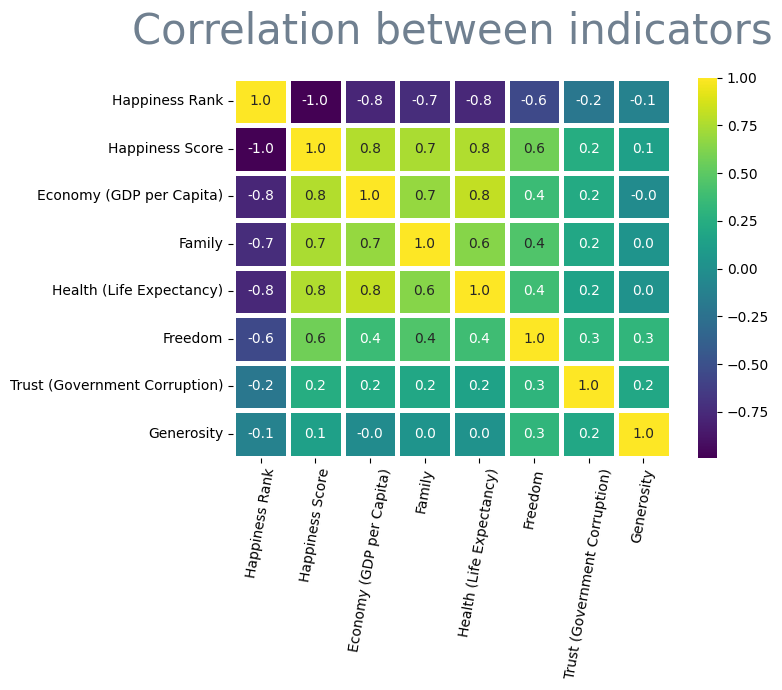

In [16]:
#creating a correlation heatmap
y,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(correlation_matrix,annot=True, linewidths=2.50, fmt= '.1f',ax=ax, cmap="viridis")
plt.xticks(rotation=80) 
ax.set_title("Correlation between indicators",font="Times New Roman", fontsize=30, color ='slategray', pad=25)

#display the correlation heatmap
y.tight_layout()
plt.show()

The highest dependencies are found between Happiness Score and the GDP per capita and life expectancy. The smallest dependencies are between Happiness Score and generosity.

# Changing the happiness level for the top 10 countries every year

In [17]:
df2015 = data2015.iloc[:10,:]
df2016 = data2016.iloc[:10,:]
df2017 = data2017.iloc[:10,:]
df2018 = data2018.iloc[:10,:]
df2019 = data2019.iloc[:10,:]
df2020 = data2020.iloc[:10,:]

In [18]:
trace1 =go.Scatter(
                    x = df2015['Country'],
                    y = df2015['Happiness Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(color ="#481567"),
                    text= df2015.Country)
trace1
# creation trace2
trace2 =go.Scatter(
                    x = df2016['Country'],
                    y = df2016['Happiness Score'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "#33638D"),
                    text= df2016.Country)
# creation trace3
trace3 =go.Scatter(
                    x = df2017['Country'],
                    y = df2017['Happiness Score'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(color = '#238A8D'),
                    text= df2017.Country)

# creation trace4
trace4 =go.Scatter(
                    x = df2018['Country'],
                    y = df2018['Happiness Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = '#29AF7F'),
                    text= df2018.Country)

# creation trace5
trace5 =go.Scatter(
                    x = df2019['Country'],
                    y = df2019['Happiness Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = '#B8DE29'),
                    text= df2019.Country)

# creation trace6
trace6 =go.Scatter(
                    x = df2020['Country'],
                    y = df2020['Happiness Score'],
                    mode = "markers",
                    name = "2020",
                    marker = dict(color = '#FDE725'),
                    text= df2020.Country)

data = [trace1, trace2, trace3, trace4, trace5,trace6]
layout = dict(title = 'Happiness level change for the top 10 countries',
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness indicator',ticklen= 5,zeroline= False),
              hovermode="x unified"
             )
fig = dict(data = data, layout = layout)
iplot(fig)


The chart shows the change in the happiness indicator of the top ten countries in the ranking for each year. In the chart, you can see that the first ten items were mostly repeatable, but not constant. When you hover over the chart, data on the happiness indicator in individual years in the selected country are displayed. An additional functionality is the ability to select years in the legend that we would like to compare with each other.

# Comparison of the values of GDP, Freedom, Trust in the government, Life expectancy in the top 10 countries in 2015-2020
The charts below present a comparison of indicators related to GDP, freedom, trust in the government, and life expectancy in the countries in the top ten in particular years. When you hover over the graph, data on a given indicator in individual years in the selected country are displayed. An additional functionality is the ability to select indicators in the legend that we would like to compare with each other.

## Comparison of the values of GDP, Freedom, Trust in government, Life expectancy in the top 10 countries in 2015

In [19]:
trace1 = go.Scatter(x = df2015['Country'],
                    y = df2015['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy (GDP per Capita)",
                    marker = dict(color = '#481567'),
                    text= df2015.Country)

trace2 = go.Scatter(x = df2015['Country'],
                    y = df2015['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2015.Country)

trace3 = go.Scatter(x = df2015['Country'],
                    y = df2015['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust (Government Corruption)",
                    marker = dict(color = '#238A8D'),
                    text= df2015.Country)
 
trace4 = go.Scatter(x = df2015['Country'],
                    y = df2015['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2015.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'GDP - Freedom - Trust in the government - Life expectancy' + '<br>' + 'Comparison for the 10 happiest countries in 2015',
              xaxis= dict(title= 'Kraje',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

## Comparison of the values of GDP, Freedom, Trust in government, Life expectancy in the top 10 countries in 2016

In [20]:
trace1 = go.Scatter(x = df2016['Country'],
                    y = df2016['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy (GDP per Capita)",
                    marker = dict(color = '#481567'),
                    text= df2016.Country)

trace2 = go.Scatter(x = df2016['Country'],
                    y = df2016['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2016.Country)

trace3 = go.Scatter(x = df2016['Country'],
                    y = df2016['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust (Government Corruption)",
                    marker = dict(color = '#238A8D'),
                    text= df2016.Country)

trace4 = go.Scatter(x = df2016['Country'],
                    y = df2016['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2016.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'GDP - Freedom - Trust in the government - Life expectancy' + '<br>' + 'Comparison for the 10 happiest countries in 2016',
              xaxis= dict(title= 'Kraje',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

## Comparison of the values of GDP, Freedom, Trust in government, Life expectancy in the top 10 countries in 2017

In [21]:
trace1 = go.Scatter(x = df2017['Country'],
                    y = df2017['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy (GDP per Capita)",
                    marker = dict(color = '#481567'),
                    text= df2017.Country)

trace2 = go.Scatter(x = df2017['Country'],
                    y = df2017['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2017.Country)

trace3 = go.Scatter(x = df2017['Country'],
                    y = df2017['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust (Government Corruption)",
                    marker = dict(color = '#238A8D'),
                    text= df2017.Country)

trace4 = go.Scatter(x = df2017['Country'],
                    y = df2017['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2017.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'GDP - Freedom - Trust in the government - Life expectancy' + '<br>' + 'Comparison for the 10 happiest countries in 2017',
              xaxis= dict(title= 'Kraje',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

## PComparison of the values of GDP, Freedom, Trust in government, Life expectancy in the top 10 countries in 2018

In [22]:
trace1 = go.Scatter(x = df2018['Country'],
                    y = df2018['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy (GDP per Capita)",
                    marker = dict(color = '#481567'),
                    text= df2018.Country)

trace2 = go.Scatter(x = df2018['Country'],
                    y = df2018['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2018.Country)

trace3 = go.Scatter(x = df2018['Country'],
                    y = df2018['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust (Government Corruption)",
                    marker = dict(color = '#238A8D'),
                    text= df2018.Country)

trace4 = go.Scatter(x = df2018['Country'],
                    y = df2018['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2018.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'GDP - Freedom - Trust in the government - Life expectancy' + '<br>' + 'Comparison for the 10 happiest countries in 2018',
              xaxis= dict(title= 'Kraje',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

## Comparison of the values of GDP, Freedom, Trust in government, Life expectancy in the top 10 countries in 2019

In [23]:
trace1 = go.Scatter(x = df2019['Country'],
                    y = df2019['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy (GDP per Capita)",
                    marker = dict(color = '#481567'),
                    text= df2019.Country)

trace2 = go.Scatter(x = df2019['Country'],
                    y = df2019['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2019.Country)

trace3 = go.Scatter(x = df2019['Country'],
                    y = df2019['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust (Government Corruption)",
                    marker = dict(color = '#238A8D'),
                    text= df2019.Country)

trace4 = go.Scatter(x = df2019['Country'],
                    y = df2019['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2019.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'GDP - Freedom - Trust in government - Life expectancy' + '<br>' + 'Comparison for the 10 happiest countries in 2019',
              xaxis= dict(title= 'Kraje',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

## Comparison of the values of GDP, Freedom, Trust in government, Life expectancy in the top 10 countries in 2020

In [24]:
trace1 = go.Scatter(x = df2020['Country'],
                    y = df2020['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy (GDP per Capita)",
                    marker = dict(color = '#481567'),
                    text= df2019.Country)

trace2 = go.Scatter(x = df2020['Country'],
                    y = df2020['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = '#33638D'),
                    text= df2019.Country)

trace3 = go.Scatter(x = df2020['Country'],
                    y = df2020['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust in the government",
                    marker = dict(color = '#238A8D'),
                    text= df2020.Country)

trace4 = go.Scatter(x = df2020['Country'],
                    y = df2020['Health (Life Expectancy)'],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = '#FDE725'),
                    text= df2020.Country)


data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'GDP - Freedom - Trust in government - Life expectancy' + '<br>' + 'Comparison for the 10 happiest countries in 2020',
              xaxis= dict(title= 'Kraje',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

# Conclusions

> An essential element of data analysis is their proper implementation and the extraction of basic statistics about them. Collecting all possible information regarding the obtained data enables further reliable and comprehensive analysis. By normalizing the data, it is possible to realistically reflect the relationship between the indicators.

> Correct data visualization is also a very important element. Interactive maps used in the study allow for spatial representation of reality. The interactive charts used make it possible to look at the dependencies in more detail.

> All the data visualization methods used allow for a quick overview of the data used and allow you to draw instinctive conclusions.

# Literature
>- https://worldhappiness.report/archive/
>- https://www.pure.ed.ac.uk/ws/files/25070478/paper_94.pdf%5D